# Data Exploration Module Test

# TODO:
    - head (/)
    - info (/)
    - matrix (missing values) (/)
    - bar (missing values) (/)
    - imports Jupyter Notebook (/)
    - fix plot resolution (/)

    - data dict (types, e.g. nominal, categorial)
    - box (numeric, deviation)
    - bar/mosaic/ (categorial, deviation)
    - predictor/feature correlation (heatmap/scatter)
    - histogram (skewed/deviation)


In [1]:
import idstools.data_explorer as idsde

In [2]:
test_data = "../data/BikeRentalDaily_test.csv"
train_data = "../data/BikeRentalDaily_train.csv"

In [3]:
data_explorer_config = {"path": train_data, "type": "csv", "separator": ";"}

In [4]:
data_explorer = idsde.DataExplorer(input_path=train_data, output_path="results")

2024-02-02 20:03:00,053 [data_explorer] [INFO] - Initializing DataExplorer
2024-02-02 20:03:00,054 [_helpers] [INFO] - Reading csv file:
/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-02 20:03:00,059 [data_explorer] [INFO] - Using output path: results
2024-02-02 20:03:00,061 [data_explorer] [INFO] - Pipeline configuration:
{}



In [44]:
data_explorer.descriptive_analysis()

2024-02-02 20:03:42,486 [data_explorer] [INFO] - Head of BikeRentalDaily_train
                          0           1           2           3           4
instant                 154         685         368         472         442
dteday           03.06.2011  15.11.2012  03.01.2012  16.04.2012  17.03.2012
season                  2.0         4.0         1.0         2.0         1.0
yr                        0           1           1           1           1
mnth                      6          11           1           4           3
holiday                   0           0           0           1           0
weekday                   5           4           2           1          -1
workingday                1           1           1           0           0
weathersit                1           2           1           1           2
temp                   24.8       12.87         6.0       26.57       20.57
atemp                  0.59        0.32        0.13        0.61        0.51
hum      

2024-02-02 20:06:09,776 [data_explorer] [ERROR] - Error in generating and saving plot (BikeRentalDaily_train): [Errno 2] No such file or directory: '/home/davidrmn/Studies/introduction-data-science/project/results/BikeRentalDaily_train_correlation_heatmap_plot.png'


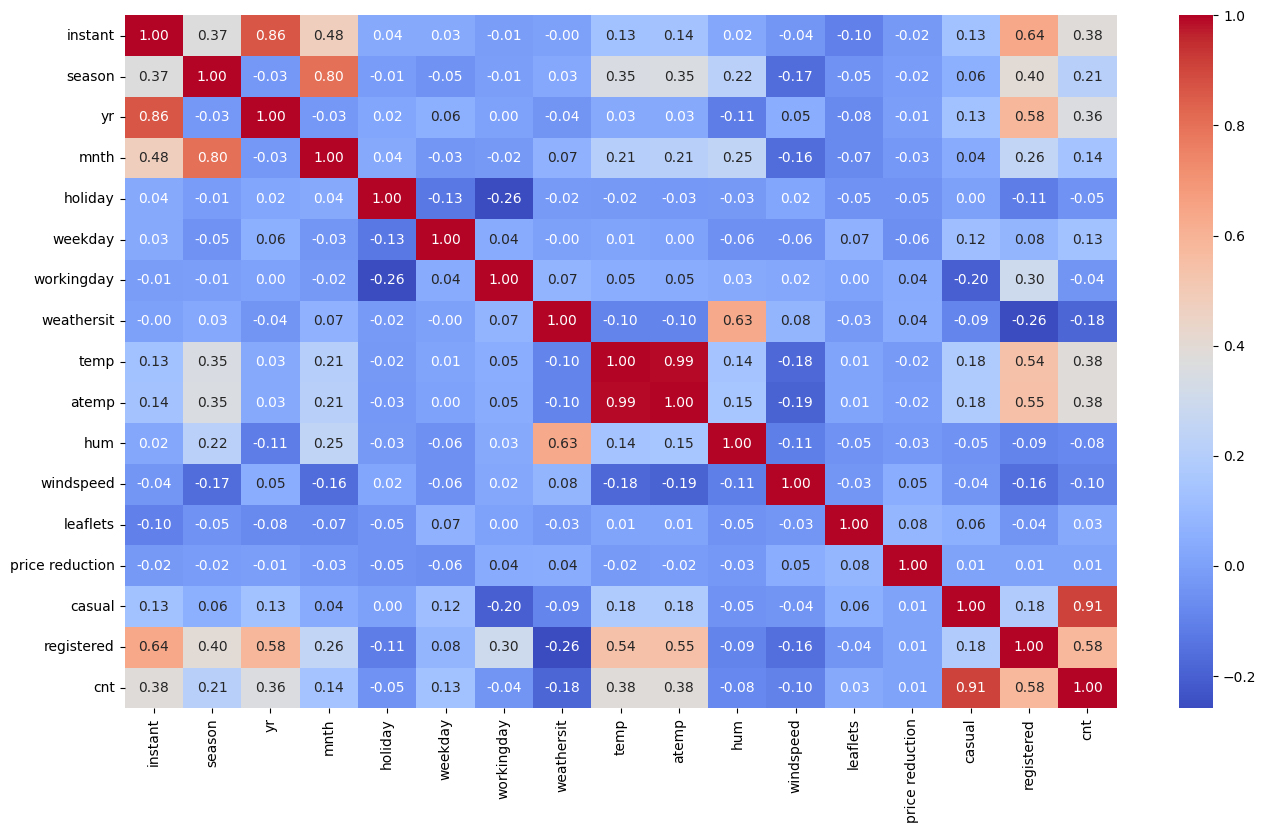

In [47]:
data_explorer.correlation_heatmap_plot()

In [45]:
data_explorer.head

,0,1,2,3,4
instant,154,685,368,472,442
dteday,03.06.2011,15.11.2012,03.01.2012,16.04.2012,17.03.2012
season,2.0,4.0,1.0,2.0,1.0
yr,0,1,1,1,1
mnth,6,11,1,4,3
holiday,0,0,0,1,0
weekday,5,4,2,1,-1
workingday,1,1,1,0,0
weathersit,1,2,1,1,2
temp,24.8,12.87,6.0,26.57,20.57


# Data Preparation Module Test

In [6]:
import idstools.data_preparation as dp

In [7]:
test_data = "../data/BikeRentalDaily_test.csv"
train_data = "../data/BikeRentalDaily_train.csv"

In [8]:
data_preparation = dp.DataPreparation(input_path=train_data, output_path="results")


2024-02-02 20:03:00,383 [data_preparation] [INFO] - Initializing DataPreparation
2024-02-02 20:03:00,384 [_helpers] [INFO] - Reading csv file:
/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-02 20:03:00,388 [data_preparation] [INFO] - Using output path: results
2024-02-02 20:03:00,389 [data_preparation] [INFO] - Pipeline configuration:
{}



In [9]:
import pandas as pd

def get_wday_by_date(df, date_column, weekday_column):
    # Define the weekday shift
    weekday_shift = {
        6: 0,
        0: 1,
        1: 2,
        2: 3,
        3: 4,
        4: 5,
        5: 6
    }

    # Convert the date column to datetime
    df[date_column] = pd.to_datetime(df[date_column], format="%d.%m.%Y")

    # Calculate the weekday and map it
    df[weekday_column] = df[date_column].dt.dayofweek.map(weekday_shift)

    return df

In [10]:
pipeline_config = {
    "_SimpleImputer": 
    [
        {
            "target": "hum",
            "config": {
                "strategy": "mean"
            }
        }
    ],
    "_CustomTransformer": 
    [
        {
            "func": get_wday_by_date,
            "config": {
                "date_column": "dteday",
                "weekday_column": "weekday"
            }
        }
    ]
}

In [11]:
pipeline = data_preparation.build_pipeline(config=pipeline_config)
pipeline

2024-02-02 20:03:00,416 [data_preparation] [INFO] - Pipeline created.


Pipeline(steps=[('_SimpleImputer',
                 _SimpleImputer(config=[{'config': {'strategy': 'mean'},
                                         'target': 'hum'}])),
                ('_CustomTransformer',
                 _CustomTransformer(config=[{'config': {'date_column': 'dteday',
                                                        'weekday_column': 'weekday'},
                                             'func': <function get_wday_by_date at 0x7f1390ec6d40>}]))])

In [12]:
processed_data = data_preparation.run_pipeline(config=pipeline_config)

2024-02-02 20:03:00,469 [data_preparation] [INFO] - Pipeline step _SimpleImputer has been processed.
2024-02-02 20:03:00,476 [data_preparation] [INFO] - Pipeline step _CustomTransformer has been processed.


In [13]:
processed_data.head(5).T

,0,1,2,3,4
instant,154,685,368,472,442
dteday,2011-06-03 00:00:00,2012-11-15 00:00:00,2012-01-03 00:00:00,2012-04-16 00:00:00,2012-03-17 00:00:00
season,2.0,4.0,1.0,2.0,1.0
yr,0,1,1,1,1
mnth,6,11,1,4,3
holiday,0,0,0,1,0
weekday,5,4,2,1,6
workingday,1,1,1,0,0
weathersit,1,2,1,1,2
temp,24.8,12.87,6.0,26.57,20.57


In [14]:
processed_data.describe().T

,count,mean,min,25%,50%,75%,max,std
instant,600.0,363.12,1.0,181.25,362.5,538.25,731.0,208.71
dteday,600,2011-12-29 02:48:00,2011-01-01 00:00:00,2011-06-30 06:00:00,2011-12-28 12:00:00,2012-06-21 06:00:00,2012-12-31 00:00:00,NaN
season,538.0,2.44,1.0,1.0,2.0,3.0,4.0,1.11
yr,600.0,0.5,0.0,0.0,0.0,1.0,1.0,0.5
mnth,600.0,6.47,1.0,4.0,6.0,9.0,12.0,3.44
holiday,600.0,0.03,0.0,0.0,0.0,0.0,1.0,0.17
weekday,600.0,3.03,0.0,1.0,3.0,5.0,6.0,2.01
workingday,600.0,0.68,0.0,0.0,1.0,1.0,1.0,0.47
weathersit,600.0,1.4,1.0,1.0,1.0,2.0,3.0,0.54
temp,600.0,19.81,2.37,13.57,20.1,26.06,34.47,7.21


In [15]:
from idstools._config import _idstools

In [16]:
_idstools["default"]["data_explorer"]["DataExplorer"]["input_path"]

In [17]:
_idstools.default.data_explorer.DataExplorer.input_path

## Module Configuration

In [18]:
from idstools.data_explorer import DataExplorer
from idstools._config import _idstools, pprint_dynaconf

We have multiple options to configure the DataExplorer to analyze the BikeRentalDaily_train.csv data.

- Load the default set of parameters and adjust them to our needs. In this case all possible parameters are initialized and can be set according the the exploration steps that should be done. 

- Initialize the class with in cell defined configuration.

In [19]:
pprint_dynaconf(_idstools, notebook=True)

```yaml
DEFAULT:
  data_explorer:
    DataExplorer:
      output_path: null
      input_path: null
      input_type: null
      input_delimiter: null
      pipeline:
        descriptive_analysis: false
        missing_value_matrix_plot: false
        missing_value_bar_plot: false
        correlation_heatmap_plot: false
  data_preparation:
    DataPreparation:
      output_path: null
      input_path: null
      input_type: null
      input_delimiter: null
      pipeline:
        _SimpleImputer:
        - target: null
          config:
            strategy: null
        _OneHotEncoder:
        - target: null
          config:
            prefix: null
            dtype: null
        - target: null
          config:
            prefix: null
            dtype: null
        _FeatureDropper:
        - target: null
          config:
            axis: null
            errors: null
  model_optimization:
    ModelOptimization:
      output_path: null
      evaluation:
        metric: null
        cv: null
CUSTOM:
  data_explorer:
    DataExplorer:
      output_path: null
      input_path: data/BikeRentalDaily_train.csv
      input_type: csv
      input_delimiter: ;
      pipeline:
        descriptive_analysis: true
        missing_value_matrix_plot: true
        missing_value_bar_plot: true
        correlation_heatmap_plot: true
  data_preparation:
    DataPreparation:
      output_path: null
      input_path: data/BikeRentalDaily_test.csv
      input_type: csv
      input_delimiter: ;
      pipeline:
        _FeatureDropper:
        - target: instant
          config:
            axis: 1
            errors: ignore
        _CustomTransformer:
        - func: replace_dot_with_hyphen
          module: idstools._custom_pipelines
          config:
            target: dteday
  model_optimization:
    ModelOptimization:
      output_path: results
      evaluation:
        metric: mse
        cv: 10

```

In [20]:
config = _idstools.default.data_explorer.DataExplorer

In [21]:
pprint_dynaconf(config, notebook=True)

```yaml
output_path: null
input_path: null
input_type: null
input_delimiter: null
pipeline:
  descriptive_analysis: false
  missing_value_matrix_plot: false
  missing_value_bar_plot: false
  correlation_heatmap_plot: false

```

In [22]:
pprint_dynaconf(_idstools.custom.data_explorer.DataExplorer, notebook=True)

```yaml
output_path: null
input_path: data/BikeRentalDaily_train.csv
input_type: csv
input_delimiter: ;
pipeline:
  descriptive_analysis: true
  missing_value_matrix_plot: true
  missing_value_bar_plot: true
  correlation_heatmap_plot: true

```

In [23]:
data_explorer_config = config

In [24]:
data_explorer_config.input_path = "/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv"

In [25]:
my_data_explorer = DataExplorer(**data_explorer_config)

2024-02-02 20:03:00,788 [data_explorer] [INFO] - Initializing DataExplorer
2024-02-02 20:03:00,790 [data_explorer] [INFO] - No output path specified.
Using default output path:/home/davidrmn/Studies/introduction-data-science/project/results
2024-02-02 20:03:00,792 [data_explorer] [INFO] - Pipeline configuration:
descriptive_analysis: false
missing_value_matrix_plot: false
missing_value_bar_plot: false
correlation_heatmap_plot: false



In [26]:
result = my_data_explorer.descriptive_analysis()

2024-02-02 20:03:00,799 [data_explorer] [ERROR] - Error in descriptive_analysis: 'NoneType' object has no attribute 'head'


## Another example of custom transformer

Simply start by importing the configuration. As always, you can provide your own configuration or load and edit the default one to see what parameters are possible to edit.

In [27]:
from idstools._config import _idstools, pprint_dynaconf

Load the transformer config of the _CustomTransformer defined in the custom pipeline as an example.

In [28]:
transformer_config = _idstools.custom.data_preparation.DataPreparation.pipeline._CustomTransformer

Now show what is configured to execute in this step of the data preparation. As you can see there is a function referenced that is part of the _custom_piplines module of the idstools package.

In [29]:
pprint_dynaconf(transformer_config, notebook=True)

```yaml
- func: replace_dot_with_hyphen
  module: idstools._custom_pipelines
  config:
    target: dteday

```

Here you can see how the function is implemented in the module. 

IMPORTANT: Each function for the _CustomTransformer takes the DataFrame with which the DataPreparation Class of the data_perparation module was initialized and performs any implemented function on it. Based on the arguments provided, in this case there is only one argument: "target" which references a column in the DataFrame which has values from which all dots "." are getting replaced with hyphens "-".

In [30]:
!cat /home/davidrmn/Studies/introduction-data-science/src/idstools/_custom_transformer.py

import pandas as pd
from idstools._helpers import setup_logging

logger = setup_logging(__name__)

def replace_dot_with_hyphen(df: pd.DataFrame, target: str) -> pd.DataFrame:
    if target in df.columns:
        df[target] = df[target].str.replace('.', '-', regex=False)
    else:
        logger.error(f"Column '{target}' not found in DataFrame.")
    return df

Now we can again show the whole DataPerparation config:

In [31]:
pprint_dynaconf(_idstools.custom.data_preparation.DataPreparation, notebook=True)

```yaml
output_path: null
input_path: data/BikeRentalDaily_test.csv
input_type: csv
input_delimiter: ;
pipeline:
  _FeatureDropper:
  - target: instant
    config:
      axis: 1
      errors: ignore
  _CustomTransformer:
  - func: replace_dot_with_hyphen
    module: idstools._custom_pipelines
    config:
      target: dteday

```

I dont want to drop instant so I set the pipeline to only execute the _CustomTransformer:

In [32]:
config = _idstools.custom.data_preparation.DataPreparation

In [33]:
config.pipeline = {"_CustomTransformer" : transformer_config}

In [34]:
pprint_dynaconf(config, notebook=True)

```yaml
output_path: null
input_path: data/BikeRentalDaily_test.csv
input_type: csv
input_delimiter: ;
pipeline:
  _CustomTransformer:
  - func: replace_dot_with_hyphen
    module: idstools._custom_pipelines
    config:
      target: dteday

```

In [35]:
from idstools.data_preparation import DataPreparation
my_data_preparation = DataPreparation(**config) 

2024-02-02 20:03:01,004 [data_preparation] [INFO] - Initializing DataPreparation
2024-02-02 20:03:01,006 [_helpers] [INFO] - Reading csv file:
/home/davidrmn/Studies/introduction-data-science/project/data/BikeRentalDaily_test.csv
2024-02-02 20:03:01,007 [_helpers] [ERROR] - Error in read_data: [Errno 2] No such file or directory: '/home/davidrmn/Studies/introduction-data-science/project/data/BikeRentalDaily_test.csv'
2024-02-02 20:03:01,008 [data_preparation] [INFO] - No output path specified.
Using default output path:/home/davidrmn/Studies/introduction-data-science/results
2024-02-02 20:03:01,010 [data_preparation] [INFO] - Pipeline configuration:
_CustomTransformer:
- func: replace_dot_with_hyphen
  module: idstools._custom_pipelines
  config:
    target: dteday



As you can see it almost worked! As I am in Jupyter the code resolves to the wrong path, need to fix this still. As a workaround we can set the Path as absolute Path.

At the moment it is relative the the package root. But as this notebook which executes the code is not we need to adjust.

In [36]:
config.input_path

'data/BikeRentalDaily_test.csv'

In [37]:
config.input_path = "/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv"

Now lets try again.

In [38]:
my_data_preparation = DataPreparation(**config) 

2024-02-02 20:03:01,032 [data_preparation] [INFO] - Initializing DataPreparation
2024-02-02 20:03:01,033 [_helpers] [INFO] - Reading csv file:
/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-02 20:03:01,038 [data_preparation] [INFO] - No output path specified.
Using default output path:/home/davidrmn/Studies/introduction-data-science/results
2024-02-02 20:03:01,040 [data_preparation] [INFO] - Pipeline configuration:
_CustomTransformer:
- func: replace_dot_with_hyphen
  module: idstools._custom_pipelines
  config:
    target: dteday



It worked so lets run the preconfigured pipeline of the DataPreparation instance we just created.

In [39]:
my_data_preparation.build_pipeline(config.pipeline)

2024-02-02 20:03:01,047 [data_preparation] [INFO] - Pipeline created.


Pipeline(steps=[('_CustomTransformer',
                 _CustomTransformer(config=<BoxList: [{'func': 'replace_dot_with_hyphen', 'module': 'idstools._custom_pipelines', 'config': {'target': 'dteday'}}]>))])

In [40]:
my_data_preparation.run_pipeline(config.pipeline)

2024-02-02 20:03:01,061 [data_preparation] [ERROR] - Error in run_pipeline: Could not import function: replace_dot_with_hyphen from module: idstools._custom_pipelines. Error: No module named 'idstools._custom_pipelines'


The two steps above can also be introduced by the run method of the class. Btw, each class of the package has a run method to orchestrate the class.

In [41]:
my_data_preparation.run()

2024-02-02 20:03:01,069 [data_preparation] [INFO] - Pipeline created.
2024-02-02 20:03:01,071 [data_preparation] [ERROR] - Error in run_pipeline: Could not import function: replace_dot_with_hyphen from module: idstools._custom_pipelines. Error: No module named 'idstools._custom_pipelines'
2024-02-02 20:03:01,071 [_helpers] [INFO] - Writing data to:
/home/davidrmn/Studies/introduction-data-science/results/BikeRentalDaily_train_processed.csv
2024-02-02 20:03:01,072 [_helpers] [ERROR] - Error in write_data: 'str' object has no attribute 'parent'


As you can see now this also automatically writes the results to the output_path instead of returning it. Of course you can also save it manually after build and run ;)

In [42]:
my_data_preparation.write_data()

2024-02-02 20:03:01,078 [_helpers] [INFO] - Writing data to:
/home/davidrmn/Studies/introduction-data-science/results/BikeRentalDaily_train_processed.csv
2024-02-02 20:03:01,079 [_helpers] [ERROR] - Error in write_data: 'str' object has no attribute 'parent'


This project is still in development but imagine what can be automated and build with it :)

Cheers